<a href="https://colab.research.google.com/github/ncourtel1/Kaggle-Titanic/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data and Library

In [3026]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [3027]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Exploring Data

## Check information

In [3028]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3029]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3030]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3031]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [3032]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Groupby information

In [3033]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()
# Group the mean of the survived column for each Pclass
# So here, 62% of people in the first class survived

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [3034]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()
# Group the mean of the survived column for the Sex column
# So here, 74% of women survived and 18% of men survived

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [3035]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [3036]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [3037]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
# Create new column FamilySize with number of siblings/spouse + number of parents/children + 1(the personne himself )

In [3038]:
train_df.groupby(['FamilySize'], as_index=False)['Survived'].mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [3039]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
# Create a new dictionary with category based on family size

In [3040]:
train_df['FamilySize_Grouped'] = train_df['FamilySize'].map(family_map)
test_df['FamilySize_Grouped'] = test_df['FamilySize'].map(family_map)
# Create new columns with the dictionary

In [3041]:
train_df.groupby(['FamilySize_Grouped'], as_index=False)['Survived'].mean()

,FamilySize_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [3042]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# Data Engineering

### Age qcut

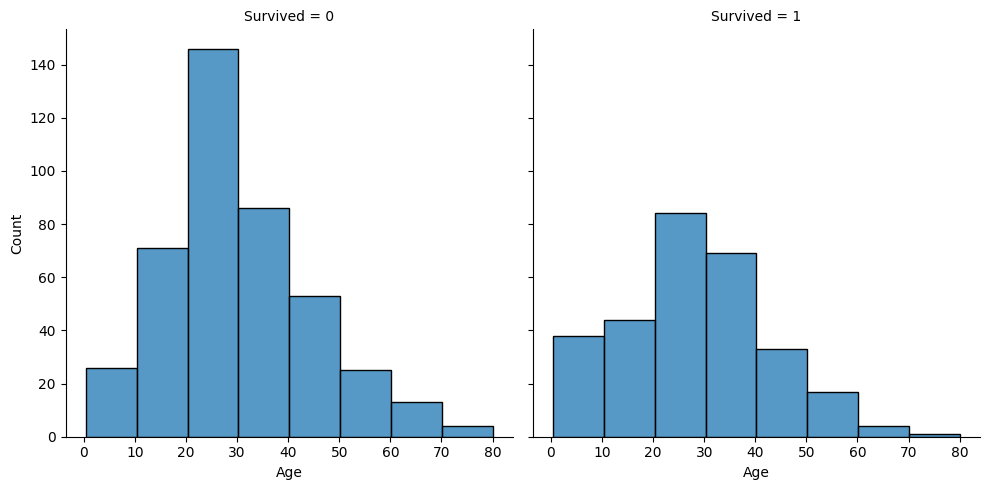

In [3043]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10)
# displot est une fonction de Seaborn utilisée pour créer des graphiques de distribution
# col='Survived': Ce paramètre crée un facettage par colonne basé sur la variable Survived
# binwidth=10 : Détermine la largeur de chaque "bin" (barre) de l'histogramme, fixée ici à 10 ans.

In [3044]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 5)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 5)
# pd.qcut() : Cette fonction permet de diviser une série de données en quantiles égaux
# Elle divise les données de sorte que chaque intervalle contienne environ le même nombre d’observations.

In [3045]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

,Age_Cut,Survived
0,"(0.419, 19.0]",0.481707
1,"(19.0, 25.0]",0.328467
2,"(25.0, 31.8]",0.393701
3,"(31.8, 41.0]",0.437500
4,"(41.0, 80.0]",0.373239


In [3046]:
train_df.loc[train_df['Age'] <= 19, 'Age'] = 0
# loc permet de sélectionner des lignes et des colonnes spécifiques dans un DataFrame en fonction de conditions
# train_df['Age'] <= 16 : C'est la condition utilisée pour sélectionner les lignes.
# 'Age' (à l’intérieur de loc) : Ce nom de colonne indique que l’on souhaite modifier les valeurs dans la colonne Age des lignes sélectionnées par la condition.
# = 0 : Cela affecte la valeur 0 à la colonne Age pour toutes les lignes où la condition (train_df['Age'] <= 16) est remplie

In [3047]:
train_df.loc[(train_df['Age'] > 19) & (train_df['Age'] <= 25), 'Age'] = 1
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 31.8), 'Age'] = 2
train_df.loc[(train_df['Age'] > 31.8) & (train_df['Age'] <= 41), 'Age'] = 3
train_df.loc[(train_df['Age'] > 41) & (train_df['Age'] <= 380), 'Age'] = 4
train_df.loc[train_df['Age'] > 80, 'Age']

,Age


In [3048]:
test_df.loc[test_df['Age'] <= 19, 'Age'] = 0
test_df.loc[(test_df['Age'] > 19) & (test_df['Age'] <= 25), 'Age'] = 1
test_df.loc[(test_df['Age'] > 25) & (test_df['Age'] <= 31.8), 'Age'] = 2
test_df.loc[(test_df['Age'] > 31.8) & (test_df['Age'] <= 41), 'Age'] = 3
test_df.loc[(test_df['Age'] > 41) & (test_df['Age'] <= 380), 'Age'] = 4
test_df.loc[test_df['Age'] > 80, 'Age']

,Age


In [3049]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySize_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,2,Small,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,1,Alone,"(31.8, 41.0]"


### Fare qcut

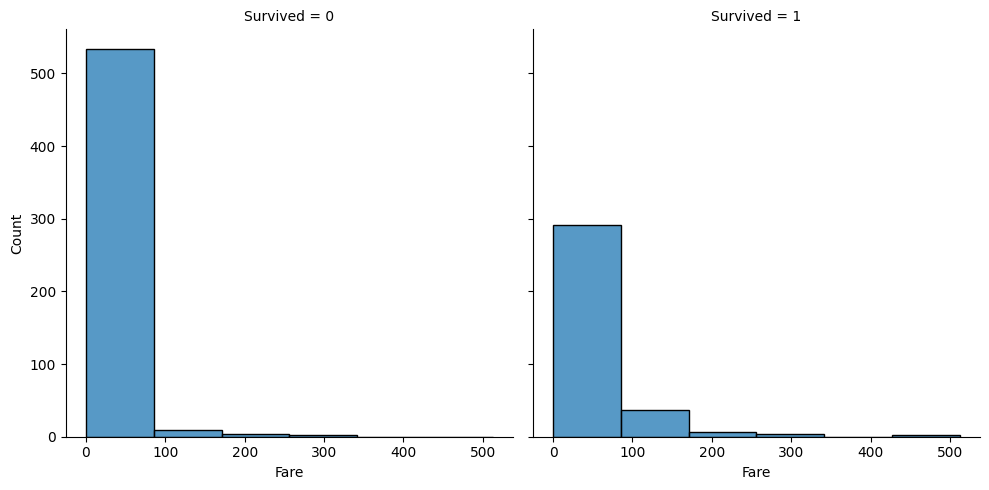

In [3050]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [3051]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 5)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 5)

In [3052]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [3053]:
train_df.loc[train_df['Fare'] <= 7.854, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.854) & (train_df['Fare'] <= 10.5), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 10.5) & (train_df['Fare'] <= 21.679), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 21.679) & (train_df['Fare'] <= 39.688), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 39.688) & (train_df['Fare'] <= 512.329), 'Fare'] = 4
train_df.loc[train_df['Fare'] > 512.329, 'Fare']

,Fare
258,512.3292
679,512.3292
737,512.3292


In [3054]:
test_df.loc[test_df['Fare'] <= 7.854, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.854) & (test_df['Fare'] <= 10.5), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 10.5) & (test_df['Fare'] <= 21.679), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 21.679) & (test_df['Fare'] <= 39.688), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 39.688) & (test_df['Fare'] <= 512.329), 'Fare'] = 4
test_df.loc[test_df['Fare'] > 512.329, 'Fare']

,Fare
343,512.3292


### Name/Title

In [3055]:
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [3056]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Extract only the title of every person

In [3057]:
train_df['Title']

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [3058]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [3059]:
train_df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [3060]:
test_df['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [3061]:
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col','Major'], 'Military')
train_df['Title'] = train_df['Title'].replace(['Don', 'Jonkheer', 'Countess', 'Dona', 'Lady', 'Sir'], 'Noble')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme'], 'Mrs')
# Group Title by category

In [3062]:
test_df['Title'] = test_df['Title'].replace(['Capt', 'Col','Major'], 'Military')
test_df['Title'] = test_df['Title'].replace(['Don', 'Jonkheer', 'Countess', 'Dona', 'Lady', 'Sir'], 'Noble')
test_df['Title'] = test_df['Title'].replace(['Mlle', 'Ms'], 'Miss')

In [3063]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,185,0.702703
4,Mr,517,0.156673
5,Mrs,126,0.793651
6,Noble,5,0.600000
7,Rev,6,0.000000


In [3064]:
test_df['Title'].value_counts()

,count
Title,
Mr,240
Miss,79
Mrs,72
Master,21
Military,2
Rev,2
Dr,1
Noble,1


## Ticket

In [3065]:
#Split by space and store first part in TicketLetter
train_df['TicketLetter']=train_df.Ticket.apply(lambda x: x.split(' ')[0] if x.isdigit()==False else 'NoPre')
#Split by space and store second part in TicketNumber
train_df['TicketNumber']=train_df.Ticket.apply(lambda x: x.split(' ')[-1] if x.isdigit()==False else x)

test_df['TicketLetter']=test_df.Ticket.apply(lambda x: x.split(' ')[0] if x.isdigit()==False else 'NoPre')
test_df['TicketNumber']=test_df.Ticket.apply(lambda x: x.split(' ')[-1] if x.isdigit()==False else x)

In [3066]:
train_df.groupby(['TicketLetter'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketLetter,count,mean
17,NoPre,661,0.384266
19,PC,60,0.650000
9,C.A.,27,0.481481
37,STON/O,12,0.416667
4,A/5,10,0.100000
40,W./C.,9,0.111111
12,CA.,8,0.125000
34,SOTON/O.Q.,8,0.125000
5,A/5.,7,0.142857
36,SOTON/OQ,7,0.142857


In [3067]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [3068]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

,TicketNumber
0,1
1,1
2,1
3,2
4,1
...,...
886,1
887,1
888,2
889,1


In [3069]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [3070]:
reps = {'.' : '','/':''}
train_df.TicketLetter=train_df.TicketLetter.str.translate(str.maketrans(reps))
test_df.TicketLetter=test_df.TicketLetter.str.translate(str.maketrans(reps))
#Remove slashes and dots from TicketLetter

train_df.groupby(['TicketLetter'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketLetter,count,mean
10,NoPre,661,0.384266
11,PC,60,0.650000
4,CA,41,0.341463
1,A5,21,0.095238
24,SOTONOQ,15,0.133333
26,STONO,12,0.416667
29,WC,10,0.100000
0,A4,7,0.000000
18,SCPARIS,7,0.428571
27,STONO2,6,0.500000


In [3071]:
train_df['TicketLetter']=train_df['TicketLetter'].replace("sotono2","stono2") #Improves score
train_df['TicketLetter']=train_df['TicketLetter'].replace("sotonoq","stonoq") #Improves score

test_df['TicketLetter']=test_df['TicketLetter'].replace("sotono2","stono2") #Improves score
test_df['TicketLetter']=test_df['TicketLetter'].replace("sotonoq","stonoq") #Improves score

In [3072]:
train_df.TicketNumber.sort_values()

,TicketNumber
283,10482
257,110152
504,110152
759,110152
262,110413
...,...
10,9549
179,LINE
271,LINE
302,LINE


In [3073]:
# Seen in another Notebook
train_df.TicketNumber = train_df.TicketNumber.replace('LINE', '347742')
test_df.TicketNumber = test_df.TicketNumber.replace('LINE', '347742')

In [3074]:
train_df.TicketNumber = train_df.TicketNumber.astype(int)
test_df.TicketNumber = test_df.TicketNumber.astype(int)

In [3075]:
(train_df['TicketLetter'] == 'NoPre').sum()

661

## Cabin

In [3076]:
train_df['CabinAssigned'] = train_df['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test_df['CabinAssigned'] = test_df['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [3077]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,FamilySize_Grouped,Age_Cut,Fare_Cut,Title,TicketLetter,TicketNumber,TicketNumberCounts,CabinAssigned
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,S,2,Small,"(19.0, 25.0]","(-0.001, 7.854]",Mr,A5,21171,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,...,C,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,PC,17599,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,S,1,Alone,"(25.0, 31.8]","(7.854, 10.5]",Miss,STONO2,3101282,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,...,S,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,NoPre,113803,2,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,...,S,1,Alone,"(31.8, 41.0]","(7.854, 10.5]",Mr,NoPre,373450,1,0


In [3078]:
train_df.shape

(891, 21)

In [3079]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               204 non-null    object  
 11  Embarked            889 non-null    object  
 12  FamilySize          891 non-null    int64   
 13  FamilySize_Grouped  891 non-null    object  
 14  Age_Cut             714 non-null    category
 15  Fare_Cut            891 non-null    cate

In [3080]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySize_Grouped,Age_Cut,Fare_Cut,Title,TicketLetter,TicketNumber,TicketNumberCounts,CabinAssigned
0,892,3,"Kelly, Mr. James",male,3.0,0,0,330911,0.0,NaN,Q,1,Alone,"(30.0, 42.0]","(7.796, 11.025]",Mr,NoPre,330911,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,4.0,1,0,363272,0.0,NaN,S,2,Small,"(42.0, 76.0]","(-0.001, 7.796]",Mrs,NoPre,363272,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,4.0,0,0,240276,1.0,NaN,Q,1,Alone,"(42.0, 76.0]","(7.796, 11.025]",Mr,NoPre,240276,1,0
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,1.0,NaN,S,1,Alone,"(25.0, 30.0]","(7.796, 11.025]",Mr,NoPre,315154,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,2.0,NaN,S,3,Small,"(20.0, 25.0]","(11.025, 21.438]",Mrs,NoPre,3101298,1,0


In [3081]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [3082]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Age

In [3083]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

## Embarked

In [3084]:
train_df['Embarked'].fillna('S', inplace=True)

In [3085]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3086]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


# Encoding

In [3087]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilySize,FamilySize_Grouped,Age_Cut,Fare_Cut,Title,TicketLetter,TicketNumber,TicketNumberCounts,CabinAssigned
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,S,2,Small,"(19.0, 25.0]","(-0.001, 7.854]",Mr,A5,21171,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,...,C,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,PC,17599,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,S,1,Alone,"(25.0, 31.8]","(7.854, 10.5]",Miss,STONO2,3101282,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,...,S,2,Small,"(31.8, 41.0]","(39.688, 512.329]",Mrs,NoPre,113803,2,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,...,S,1,Alone,"(31.8, 41.0]","(7.854, 10.5]",Mr,NoPre,373450,1,0


In [3088]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 891 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               204 non-null    object  
 11  Embarked            891 non-null    object  
 12  FamilySize          891 non-null    int64   
 13  FamilySize_Grouped  891 non-null    object  
 14  Age_Cut             714 non-null    category
 15  Fare_Cut            891 non-null    cate

In [3089]:
categorical_columns = ['Sex', 'Embarked', 'Title']
not_categorical_columns = ['Pclass', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Age', 'PassengerId']
toDrop = ['TicketNumber', 'TicketLetter', 'Cabin', 'Fare_Cut', 'Age_Cut', 'FamilySize_Grouped']
train_df.drop(toDrop, axis=1, inplace=True)
test_df.drop(toDrop, axis=1, inplace=True)

# Encoder les colonnes catégorielles
train_df_cat = pd.get_dummies(train_df[categorical_columns], dtype=float)

# Concaténer les colonnes encodées et les colonnes non catégorielles
train_df = pd.concat([train_df['Survived'], train_df[not_categorical_columns], train_df_cat], axis=1)

# Encoder les colonnes catégorielles
test_df_cat = pd.get_dummies(test_df[categorical_columns], dtype=float)

# Concaténer les colonnes encodées et les colonnes non catégorielles
test_df = pd.concat([test_df[not_categorical_columns], test_df_cat], axis=1)

In [3090]:
train_df = train_df.set_index(train_df['PassengerId'])

In [3091]:
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,FamilySize,Age,PassengerId,Sex_female,Sex_male,...,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,0.0,2,1.0,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1,1,0,4.0,2,3.0,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,0,0,1.0,1,2.0,3,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,1,0,4.0,2,3.0,4,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0,3,0,0,1.0,1,3.0,5,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3092]:
test_df = test_df.set_index(test_df['PassengerId'])

In [3093]:
test_df.head()

,Pclass,SibSp,Parch,Fare,FamilySize,Age,PassengerId,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3,0,0,0.0,1,3.0,892,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
893,3,1,0,0.0,2,4.0,893,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
894,2,0,0,1.0,1,4.0,894,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
895,3,0,0,1.0,1,2.0,895,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
896,3,1,1,2.0,3,1.0,896,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Split Data

In [3094]:
X = train_df.drop('Survived', axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
y = train_df['Survived']

In [3095]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Model Selection

In [3096]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# get a list of models to evaluate
def get_models():
    models = dict()
    models['LGBMClassifier'] = LGBMClassifier()
    models['LogisticRegression'] = LogisticRegression()
    models['DecisionTree'] = DecisionTreeClassifier(max_depth=8) #Tuned
    models['RandomForest'] = RandomForestClassifier(max_depth=32) #Tuned
    models['GradientBoosting'] = GradientBoostingClassifier(max_depth=5) #Tuned
    models['svc'] = SVC(C=100, gamma=0.001, kernel='sigmoid') #Tuned
    return models

In [3097]:
from sklearn.model_selection import RepeatedStratifiedKFold
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [3098]:
models=get_models()
results,names=list(),list()

for name,model in models.items():
    scores=evaluate_model(model,x_scaled,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>LGBMClassifier 0.803 (0.025)
>LogisticRegression 0.823 (0.020)
>DecisionTree 0.783 (0.025)
>RandomForest 0.798 (0.028)
>GradientBoosting 0.804 (0.031)
>svc 0.821 (0.018)


In [3099]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('LogisticR', LogisticRegression()))
    level0.append(('LGBMClassifier', LGBMClassifier()))
    level0.append(('DecisionTree', DecisionTreeClassifier(max_depth=8)))
    level0.append(('RandomForest', RandomForestClassifier(max_depth=32)))
    level0.append(('GBoost', GradientBoostingClassifier()))
    level0.append(('svc', SVC(C=100, gamma=0.001, kernel='sigmoid')))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10, n_jobs= -1)
    return model

In [3100]:
model= get_stacking()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Validation accuracy : ", accuracy_score(y_test, y_pred))

Validation accuracy :  0.8156424581005587


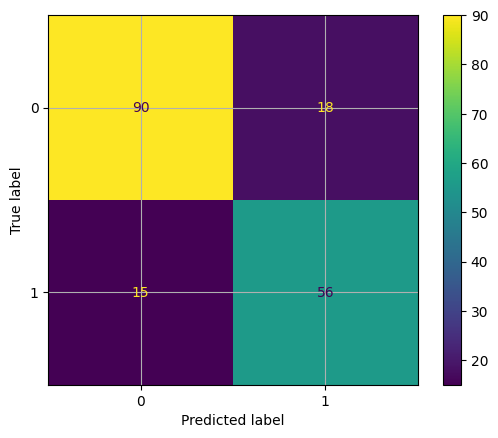

In [3101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM=confusion_matrix(y_pred,y_test,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.grid(None)

In [3102]:
test_df.head()

,Pclass,SibSp,Parch,Fare,FamilySize,Age,PassengerId,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3,0,0,0.0,1,3.0,892,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
893,3,1,0,0.0,2,4.0,893,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
894,2,0,0,1.0,1,4.0,894,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
895,3,0,0,1.0,1,2.0,895,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
896,3,1,1,2.0,3,1.0,896,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3103]:
test_pred=model.predict(scaler.transform(test_df))
sub=pd.DataFrame({'PassengerId':test_df.index,'Survived':test_pred})
sub.to_csv('submission10.csv',index=False)